# Pricing Optimizing in SQL Code-Along - April 1, 2025

# The Business Problem

Businesses care a lot about the price of their products. 

- When the products are priced too low, they lose tons of revenue.
- When the products are priced too high, they lose... tons of revenue. 

That said, even though business leaders  know that finding the correct price of a product is extremely important, they often have no analytical tools to figure out pricing optimization. Sometimes, leaders think it sounds too complex.

# The Goal of the Code-along

By the end of this code-along, I guarantee you will be able to take any dataset with two features: 
- `price`
- `quantity_sold`

and perform a powerful optimization technique in order to **find the price that maximizes revenue**. 

Having the analytical skill to solve this optimization problem is going to have real results for your company, and it's sure to make you stand out as a data analyst or a data scientist. What is more, the technique is extremely versatile; it applies to all kinds of companies and industries, whether you are selling watches, tires, or shoes.

This code-along will also be useful if you are interested in creating your own project to demonstrate your understanding of SQL, statistics, algebra, calculus, as well as showing business acumen.

## The questions to answer

1. What is the price that you can sell your product for that maximizes total revenue?
2. What revenue can you expect after you optimize the price?

# The Parts of the Code-along
This project will have three parts: 

## Part 1: Performing linear regression in SQL
- **The business case**: We will build a model to describe quantity sold as a function of price.
- **The SQL learning**: We will also practice SQL aggregate functions and common table expressions (CTEs).

## Part 2: Understanding price, quantity sold, and revenue
- **The business case**: We will then explore the use of a quadratic regression technique to describe revenue in terms of only price.
- **The SQL learning**: We will  practice using SQL subqueries.

## Part 3: Finding the price that maximizes revenue

- **The business case**: We will then learn how to find the derivative of our function, which is the theoretical price that maximizes revenue.
- **The SQL learning**: We will learn how to report the results of our optimization.

# SQL Refresher
Before we dive in, let's start off with a refresher on some common SQL functions that we will be using in this tutorial.

## Essential aggregate functions
- `COUNT(*)` – Total number of rows (used for N)
- `SUM()` – Sum of values or expressions, e.g. SUM(price * quantity_sold)
- `AVG()` – Mean of a column, needed for centering and intercept calculation
- `STDDEV()` – Standard deviation, used in slope computation via correlation
- `CORR(x, y)` – Pearson correlation between two variables

## Specialized linear regression functions (DuckDB)
- `REGR_SLOPE(y, x)` – Returns slope directly
- `REGR_INTERCEPT(y, x)` – Returns intercept directly

## Other Tools
- `WITH` clause – Common Table Expressions (CTEs), used for organizing and reusing subqueries
- `AS` – Aliasing columns and subqueries for readability and reuse


## Mathematical and Transform Functions
- `LN()` – Natural log (log base e), used for log-transforming quantity_sold
- `EXP()` – Exponential function, used to "undo" the log and model predicted quantity

# Our Dataset

This dataset is something I created myself. It has two columns: 

- `price`: this column represents the price of the products sold
- `quantity_sold`: the column represents the number of products sold at a given price

The dataset has 200 rows. Each row represents a day of sales showing how many products we sold for a given price. 

# Getting Started
Now, let's get started!

## Part 0: Exploratory data analysis
The very first thing is exploring our dataset. We are interested in two variables: `price` and `quantity_sold`. So, let's start by choosing our columns with `SELECT` and choosing our dataset with `FROM`.

### Looking at our table
As a first step, we can look at our `demand_curve_data` table.

#### Instructions

- Use `SELECT` to choose `price` and `quantity_sold` from the dataset named `"demand_curve_data.csv"`

In [ ]:
SELECT 
	price,
	quantity_sold
FROM demand_curve_data.csv

### Data visualization

Data visualization is an important part of exploratory data analysis. And DataLab comes equipped with really great visuals that make data exploration easy. Here, I'm using DataLab's built-in UI to create a scatterplot, no code required, and this scatterplot, as you can see, is integrating perfectly into our SQL workflow.

This scatterplot let's us see two things, one obvious and one not obvious:
- There's an inverse relationship between `price` and `quantity_sold`.
- The relationship is not entirely linear, and the relationship between `quantity_sold` and `price` changes for different ranges of `price`.

#### Instructions

- Use `SELECT` to choose `price` and `quantity_sold` from the dataset named `"demand_curve_data.csv"`
- Use DataLab to create a nice scatterplot

In [ ]:
SELECT 
	price,
	quantity_sold
FROM demand_curve_data.csv

## Part 1: Performing linear regression in SQL

Now that we have completed the first step, which is to look at the data and create a first visual, we can move on to creating a linear model. Here are the two parts:
- **Step 1**: The first step is to review the formulas for the slope and intercept of a simple linear regression.
- **Step 2**: The next step is to use the SQL aggregate functions to find the parts we will need so we can plug values into those equations. 

### Linear regression equations:
We can  describe the slope and intercept in this way:
- **The slope** can be expressed at the correlation ($\text{r}$) multiplied by the quotient of the standard deviation of $\text{y}$ over the standard deviation of $\text{x}$
- **The intercept** can then be expressed as the average of $\text{y}$ minus the product of the slope multiplied by the average of $\text{x}$.

Here are those equations. $\text{a}$ refers to the slope of a linear regression line, and $\text{i}$ refers to the intercept. 


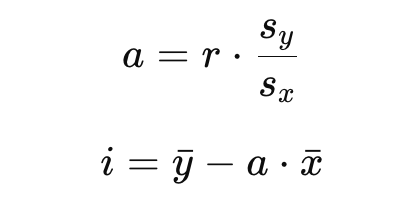

Personally, I rather like this set of equations because it shows you that, in simple linear regression, the slope is the correlation coefficient but back onto the scale of the data, and it also shows you that the regression line goes through the center of mass, which gives the regression its balancing property.

**Note**: These equations only work with simple linear regression, meaning regression that has exactly one dependent and one independent variable.

**A second note**: It's easiest to solve for the slope first.

### Working with SQL CTEs

Let's look at how to work with CTEs in SQL. We will start with how to write them and then adapt for our regression problem. 

Next, we have to refresh ourselves on how to work with common table expressions.
- We take our original query and put `WITH x AS (` in front
- We add a final `)` to the end of the query and write `SELECT * FROM`

In [ ]:
WITH regression_data AS (
	SELECT 
		price AS p,
		quantity_sold AS q
	FROM 
		demand_curve_data.csv
)
SELECT
	p,
	q
FROM regression_data

### Linear Regression in SQL with a CTE

We can express the slope and intercept in terms of correlation, standard deviation, and mean. 

**Step 1:**
- Compute `sd_quantity_sold` with `stddev(quantity_sold)`
- Compute `mean_quantity_sold` with `avg(quantity_sold)`
- Compute `sd_price` with `stddev(price)`
- Compute `mean_price` with `avg(price)`
- Compute `corr_price_quantity` with `corr(price, quantity_sold)`
  
**Step 2:**
- **Find the slope**: `corr_price_quantity * (sd_quantity_sold / sd_price)`
- **Find the intercept**: `mean_quantity_sold - (corr_price_quantity * (sd_quantity_sold / sd_price) * mean_price)`

#### Instructions

- Use the `stddev()` function to calculate the standard deviation of `quantity_sold`
- Use the `avg()` function to calculate the mean of `quantity_sold`
- Use the `stddev()` function to calculate the standard deviation of `price`
- Use the `avg()` function to calculate the mean of `price`
- Use the `corr()` function to calculate the correlation of `price` and `quantity_sold`
- Wrap our query in a CTE called `regression_data`
- Use our new variables to find the `slope`
- Use our new variables to find the `intercept`

In [ ]:
WITH regression_data AS (
	SELECT 
		STDDEV(price) AS std_price,
		AVG(price) AS mean_price,
		STDDEV(quantity_sold) AS std_quantity_sold,
		AVG(quantity_sold) AS mean_quantity_sold,
		corr(price, quantity_sold) AS correlation
	FROM demand_curve_data.csv
)
SELECT
	correlation * (std_quantity_sold / std_price) AS slope,
	mean_quantity_sold - correlation * (std_quantity_sold / std_price) * mean_price AS intercept
FROM regression_data;

### Linear regression in SQL with specialized functions

Alternatively, DuckDB has specialized regression functions.
- We can calculate the slope using `regr_slope()`
- We can calculate the intercept using `regr_intercept()`

#### Instructions

- Use the `regr_slope()` function to calculate `slope` 
- Use the `regr_intercept()` function to calculate `intercept`

In [ ]:
SELECT
	regr_slope(quantity_sold, price) AS slope,
	regr_intercept(quantity_sold, price) AS intercept
FROM
	demand_curve_data.csv;

## Part 2: Understanding price, quantity sold, and revenue

In the first part, we found the slope and intercept of a regression line that describes `quantity_sold` as a function of `price`. Now, we want to introduce a new term - `revenue`. 

In this next section, we will: 

- Understand the relationship of price and quantity sold to revenue
- Understand the meaning and use of quadratic regression 
- Understand SQL cross joins

Here is our scatterplot again:

In [ ]:
SELECT 
	price,
	quantity_sold
FROM demand_curve_data.csv

### Our equation for quantity sold
We can imagine adding here a linear regression line to our scatterplot. If we added that regression line, the equation would be: 

\text{quantity_sold} = b_0 + b_1 \cdot \text{price}

### Creating an equation for revenue

The first step is to create an equation for revenue. But what is revenue? To illustrate, think that, when we sell 100 products for 50 dollars each, our revenue is 5,000. In other words: 

\text{revenue} = \text{price} \times \text{quantity_sold}

### Creating a new equation for revenue

Because we have a linear equation to describe quantity_sold, we can now substitute `quantity_sold` for our linear function for `price`, as you see here:

\text{revenue} = \text{price} \cdot \left(b_0 + b_1 \cdot \text{price}\right)

### Cleaning up our new equation

Just as we would distribute terms in $x(1-x)$ to get $x-x^2$, we can distribute terms to get revenue defined by price as a squared term:

\text{revenue} = b_0 \cdot \text{price} + b_1 \cdot \text{price}^{2}

The advantage of this new equation is that we have revenue defined by price as a square term which will be graphed with a new shape (a parabola)

### Derivate of our new equation

\text{derivative_of_revenue} = b_0 + 2 \cdot b_1 \cdot \text{price}

### Linear model transformations

The next step is to create a transformation on our linear model. Because our scatterplot shows curvature, it will do well with a transformation. 

**Note**: Even though we make a log transformation on our linear model, it's still a linear model because the term enters our equation linearly with respect to the coefficients.

**A second note** In DuckDB, these two are different:
- `LOG()` is a base 10 log transform
- `LN()` uses $\text{e}$.


#### Instructions

- SELECT `LN()` of 100 and `LOG()` of 100 and check the output for each

In [ ]:
-- Demonstrating the LN() and LOG() are different
SELECT
	LN(100)

#### Instructions

- SELECT the `price` and the natural log of `quantity_sold` from `"demand_curve_data.csv"`

In [ ]:
SELECT 
	price,
	LN(quantity_sold)
FROM demand_curve_data.csv

**Note**: We introduced a bit of unequal variance (heteroscedasticity) but because, when we create a demand curve, we are creating a model that is based on averaging, and because we are not working with things like confidence intervals, we can ignore this.

Now that we have log transform, we have to rethink our equations. 

### Our equation for quantity sold
Here, the log of `quantity_sold` is described in terms of `price`.

$\log(\text{quantity_sold}) = b_0 + b_1 \cdot \text{price}$

### Creating an equation for revenue

Therefore, `revenue` is `price` times the `log_quantity_sold`:

$\text{revenue} = \text{price} \times \text{log(quantity_sold)}$

### Creating a new equation for revenue

So, to express `log_quantity_sold` as `price`, we put the equation as an exponent of $\text{e}$:

$\text{revenue} = \text{price} \cdot e^{b_0 + b_1 \cdot \text{price}}$

### Cleaning up our new equation
The terms don't distribute quite as easily as the algebraic terms, above:

$\text{revenue} = \text{price} \cdot e^{b_0} \cdot e^{b_1 \cdot \text{price}}$

### Working with SQL subqueries

Let’s look at how to work with subqueries in SQL. We’ll start by writing a basic subquery and then think about how to use it for our regression problem, just like the two-step process we did when practicing CTEs.

First, we need to remind ourselves how a subquery works.

### Using SQL subqueries for our regression problem

Here is how we use SQL subqueries for our regression problem.

#### Instructions

- Select price from `"demand_curve_data.csv"`
- Inside the `EXP()` function, use a subquery to calculate `intercept`:
- Inside the `EXP()` function, use another subquery to calculate `slope`:
- Multiply `slope` by `price` and add it to `intercept`
- Multiply the result of `EXP(intercept + slope * price)` by `price` to get `revenue`


In [ ]:
SELECT
	price,
	price * EXP(
	(SELECT regr_intercept(LN(quantity_sold), price) FROM demand_curve_data.csv) +
	(SELECT regr_slope(LN(quantity_sold), price) FROM demand_curve_data.csv) * price
	) AS revenue_function
FROM demand_curve_data.csv

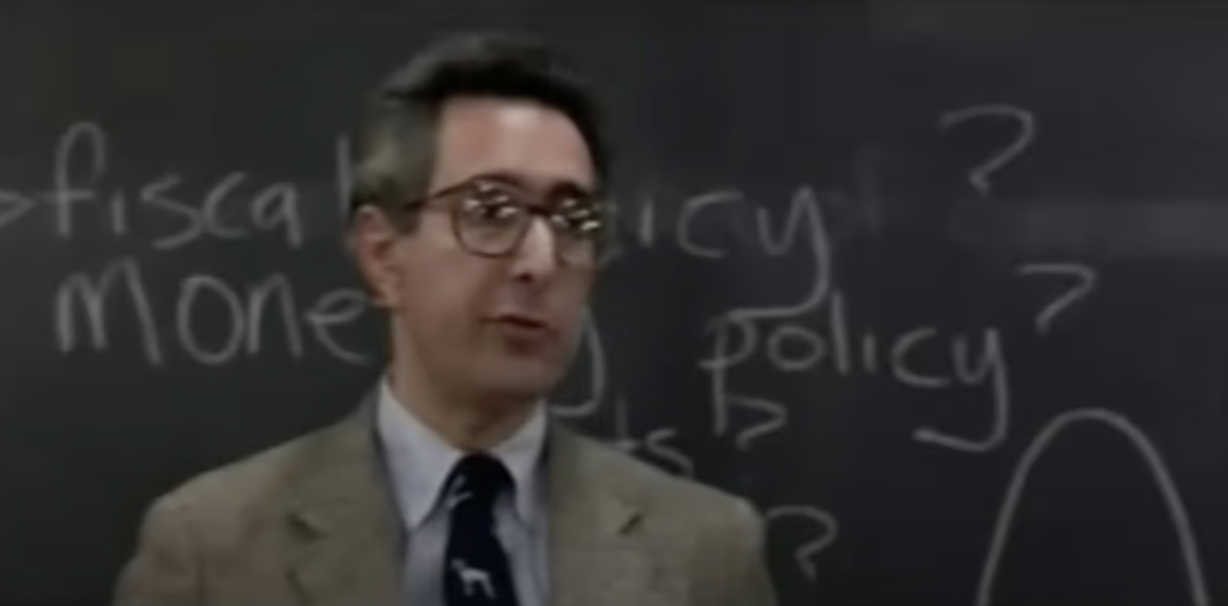

## Part 3: Finding the price that maximizes revenue
In the second part, we found a way to describe revenue by price only. Now, we need to figure out exactly where the top of our parabola is. 

This final section is for those who are interested in exactly how we found the derivative of our revenue function. This section covers how to:

- Use calculus and algebra to find the derivative of our revenue function
- Set the derivative to zero and solve

<details>
  <summary>Details on the product rule</summary> 
  <p>

### The product rule

First, we have to remember what is called the product rule in calculus. Take a look at the following equation for the function of x. 

$f(x) = u(x) * v(x)$


According to the product rule, the derivative, which we can write as f'(x), is"
- the derivative of the first thing multiplied by the section thing
- added to the first thing multiplied by the derivative of the second thing. 

$f'(x) = u'(x) * v(x) + u(x) * v'(x)$
      
  </p>
</details>

<details>
  <summary>Details on finding the derivative</summary> 
  <p>
      
### The derivative of our revenue function 

By thinking about the product rule, we can find the derivative our of revenue function:

#### our equation

$\text{revenue} = \text{price} \cdot e^{b_0 + b_1 \cdot \text{price}}$


#### derivative of our equation

$\text{derivative} = 1 * e^{b_0 + b_1 \cdot \text{price}} + \text{price} \cdot b_1 \cdot e^{b_0 + b_1 \cdot \text{price}}$


  </p>
</details>

<details>
  <summary>Details on factoring to simplify</summary> 
  <p>
      
### Factoring to simplify 
The next thing we have to do is some factoring. 

For this, we think about a rule from algebra:

$A + B * A = A(1+B)$

In our case:
- "A" = $e^{b_0 + b_1 \cdot \text{price}}$
- "B" = $\text{price} \cdot b_1$

Therefore: 

$e^{b_0 + b_1 \cdot \text{price}} + \text{price} \cdot b_1 \cdot e^{b_0 + b_1 \cdot \text{price}}$

$e^{b_0 + b_1 \cdot \text{price}} (1 + \text{price} \cdot b_1)$
      
  </p>
</details>

<details>
  <summary>Details on finding where the derivative is zero</summary> 
  <p>
      
### Finding where the derivative equals zero

Whenever A * B = 0, either A or B (or both A and B) have to equal zero. 

$e^{b_0 + b_1 \cdot \text{price}} \cdot (1 + \text{price} \cdot b_1) = 0$

Conveniently, we can remove the first half because it's an exponent and an exponent can never be zero. 

$(1 + b_1\, \text{price}) = 0$

Finally, we just have to rearrange terms.

$b_1 \, \text{price} = -1$

$\text{price} = -\frac{1}{b_1}$
      
  </p>
</details>

<details>
  <summary>Details on finding revenue maximum</summary> 
  <p>
      
### Finding the revenue maximum

To find the revenue maximum, we can take our revenue function: 

$\text{revenue} = \text{price} \cdot e^{b_0 + b_1 \cdot \text{price}}$

Then we can substitute our new definition of price:

$\text{revenue} = \left( -\frac{1}{\text{slope}} \right) \cdot e^{b_0 + b_1 \cdot \left( -\frac{1}{\text{slope}} \right)}$


We also know that b0 is the intercept and b1 is the slope:

$\text{revenue} = \left( -\frac{1}{\text{slope}} \right) \cdot e^{\text{intercept} + \text{slope} \cdot \left( -\frac{1}{\text{slope}} \right)}$


We now consolidate:

$\text{revenue} = \left( -\frac{1}{\text{slope}} \right) \cdot e^{\text{intercept} - 1}$
      
  </p>
</details>

#### Instructions

- Find `slope` and `intercept` from `"demand_curve_data.csv"`
- Wrap our query in a CTE called `regression_data`
- In our `regression_data` table, calculate `optimal_price` as `-1 / slope`
- In our `regression_data` table, calculate `max_revenue` as `(-1 / slope) * EXP(intercept - 1)`

In [ ]:
WITH regression_data AS (
		SELECT
			regr_intercept(LN(quantity_sold), price) AS intercept,
			regr_slope(LN(quantity_sold), price) AS slope
		FROM
			demand_curve_data.csv
)
SELECT
	(-1 / slope) AS optimal_price,
	(-1 / slope) * EXP(intercept - 1) AS max_revenue
FROM regression_data;

### Guessing the best price instead
To test our answer, we could try a more naive way of finding the best price. 

What if we calculated revenue in SQL, not as a model-building exercise, but as a computation:

```SQL
SELECT
    price, 
    price * quantity_sold AS revenue
FROM "demand_curve_data.csv"
ORDER BY revenue DESC
LIMIT 1
```

Here, we order our dataset by the highest revenue value and we look at the top result. 

We can see that we are 3,000 dollars away from the optimal target, which is a 14.3% difference. The reason the model-building exercise gives us a better result is because there is noise in the dataset.

In [ ]:
SELECT
    price, 
    price * quantity_sold AS revenue
FROM "demand_curve_data.csv"
ORDER BY revenue DESC
LIMIT 1


### A Final Note on Limitations
There are  exceptions where consumer behavior can defy the standard pattern of the demand curve: 

- **Giffen goods** are a rare type of inferior good for which the law of demand does not hold. When the price of a Giffen good rises, consumers may paradoxically buy more of it rather than less.
- **Veblen goods** are luxury or status-symbol products—such as designer handbags, fine wines, or high-end watches—whose demand increases as price increases. Part of their appeal comes from the perception that a higher price signals exclusivity or higher social status.

### A Final Note on Extensions

One could consider profit instead of revenue. 

If you define profit as revenue - cost, and cost is cost - unit_cost, and then if unit_cost could be written as an equation like 1 - c, you could get an upside parabola again, which would be left-adjusted since profit is always less than revenue. For another time!